In [ ]:
'''
Deep Learning Stock Price Predictor 
Author: Gil Akos
Objective: Create Benchmark Model with scikit learn regression
'''

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import required libraries for Machine Learning
import math
import numpy as np
import pandas as pd

# Import required libraries for Yahoo Finance API
import yahoo_finance as yf
from yahoo_finance import Share

# Import required libraries for visualization and printing
from pprint import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18, 12)
import matplotlib.dates as mdates
import datetime

# Import utility libraries
import utilities as util

In [81]:
#Set Benchmark Dates based on Machine Learning for Trading course 1/1/09-6/18/15
date_start, date_end = '1995-01-01', '2015-06-18'#'2015-06-18'

#Set Additional Tickers
tick_0 = 'SPY'
tick_1 = 'GE'
tick_2 = 'MSFT'
tick_3 = 'AAPL'

#Set Baseline Model Ticker
base_ticker = tick_3

In [82]:
#Request Stock Data
stock_data = Share(base_ticker)
stock_historical = stock_data.get_historical(date_start,date_end)

pprint(stock_historical)

[{'Adj_Close': '123.46691',
  'Close': '127.879997',
  'Date': '2015-06-18',
  'High': '128.309998',
  'Low': '127.220001',
  'Open': '127.230003',
  'Symbol': 'AAPL',
  'Volume': '35407200'},
 {'Adj_Close': '122.906931',
  'Close': '127.300003',
  'Date': '2015-06-17',
  'High': '127.879997',
  'Low': '126.739998',
  'Open': '127.720001',
  'Symbol': 'AAPL',
  'Volume': '32918100'},
 {'Adj_Close': '123.196574',
  'Close': '127.599998',
  'Date': '2015-06-16',
  'High': '127.849998',
  'Low': '126.370003',
  'Open': '127.029999',
  'Symbol': 'AAPL',
  'Volume': '31494100'},
 {'Adj_Close': '122.54004',
  'Close': '126.919998',
  'Date': '2015-06-15',
  'High': '127.239998',
  'Low': '125.709999',
  'Open': '126.099998',
  'Symbol': 'AAPL',
  'Volume': '43988900'},
 {'Adj_Close': '122.781413',
  'Close': '127.169998',
  'Date': '2015-06-12',
  'High': '128.330002',
  'Low': '127.110001',
  'Open': '128.190002',
  'Symbol': 'AAPL',
  'Volume': '36886200'},
 {'Adj_Close': '124.152407',
  '

In [83]:
#Define columns of data to keep from historical stock data
stock_item = []
stock_date = []
stock_close = []
stock_volume = []

#Loop through the stock data objects backwards and store factors we want to keep
i_counter = 0
for i in xrange(len(stock_historical)-1,-1,-1):
    d = stock_historical[i]
    stock_item.append(i_counter)
    stock_date.append(d['Date'])
    stock_close.append(d['Adj_Close'])
    stock_volume.append(d['Volume'])
    i_counter += 1

#Create a dataframe for stock data
stock_df = pd.DataFrame()
    
#Add factors to dataframe
stock_df['Item'] = stock_item
stock_df['Date'] = stock_date
stock_df['Adj_Close'] = pd.to_numeric(stock_close)
stock_df['Volume'] = pd.to_numeric(stock_volume)

#Print the dataframe head and tail
print(stock_df.head())
print("---")
print(stock_df.tail())

   Item        Date  Adj_Close     Volume
0     0  1995-01-03   1.228913   25967200
1     1  1995-01-04   1.260937   39670400
2     2  1995-01-05   1.244925   18410000
3     3  1995-01-06   1.344999  269155600
4     4  1995-01-09   1.319479   68521600
---
      Item        Date   Adj_Close    Volume
5147  5147  2015-06-12  122.781413  36886200
5148  5148  2015-06-15  122.540040  43988900
5149  5149  2015-06-16  123.196574  31494100
5150  5150  2015-06-17  122.906931  32918100
5151  5151  2015-06-18  123.466910  35407200


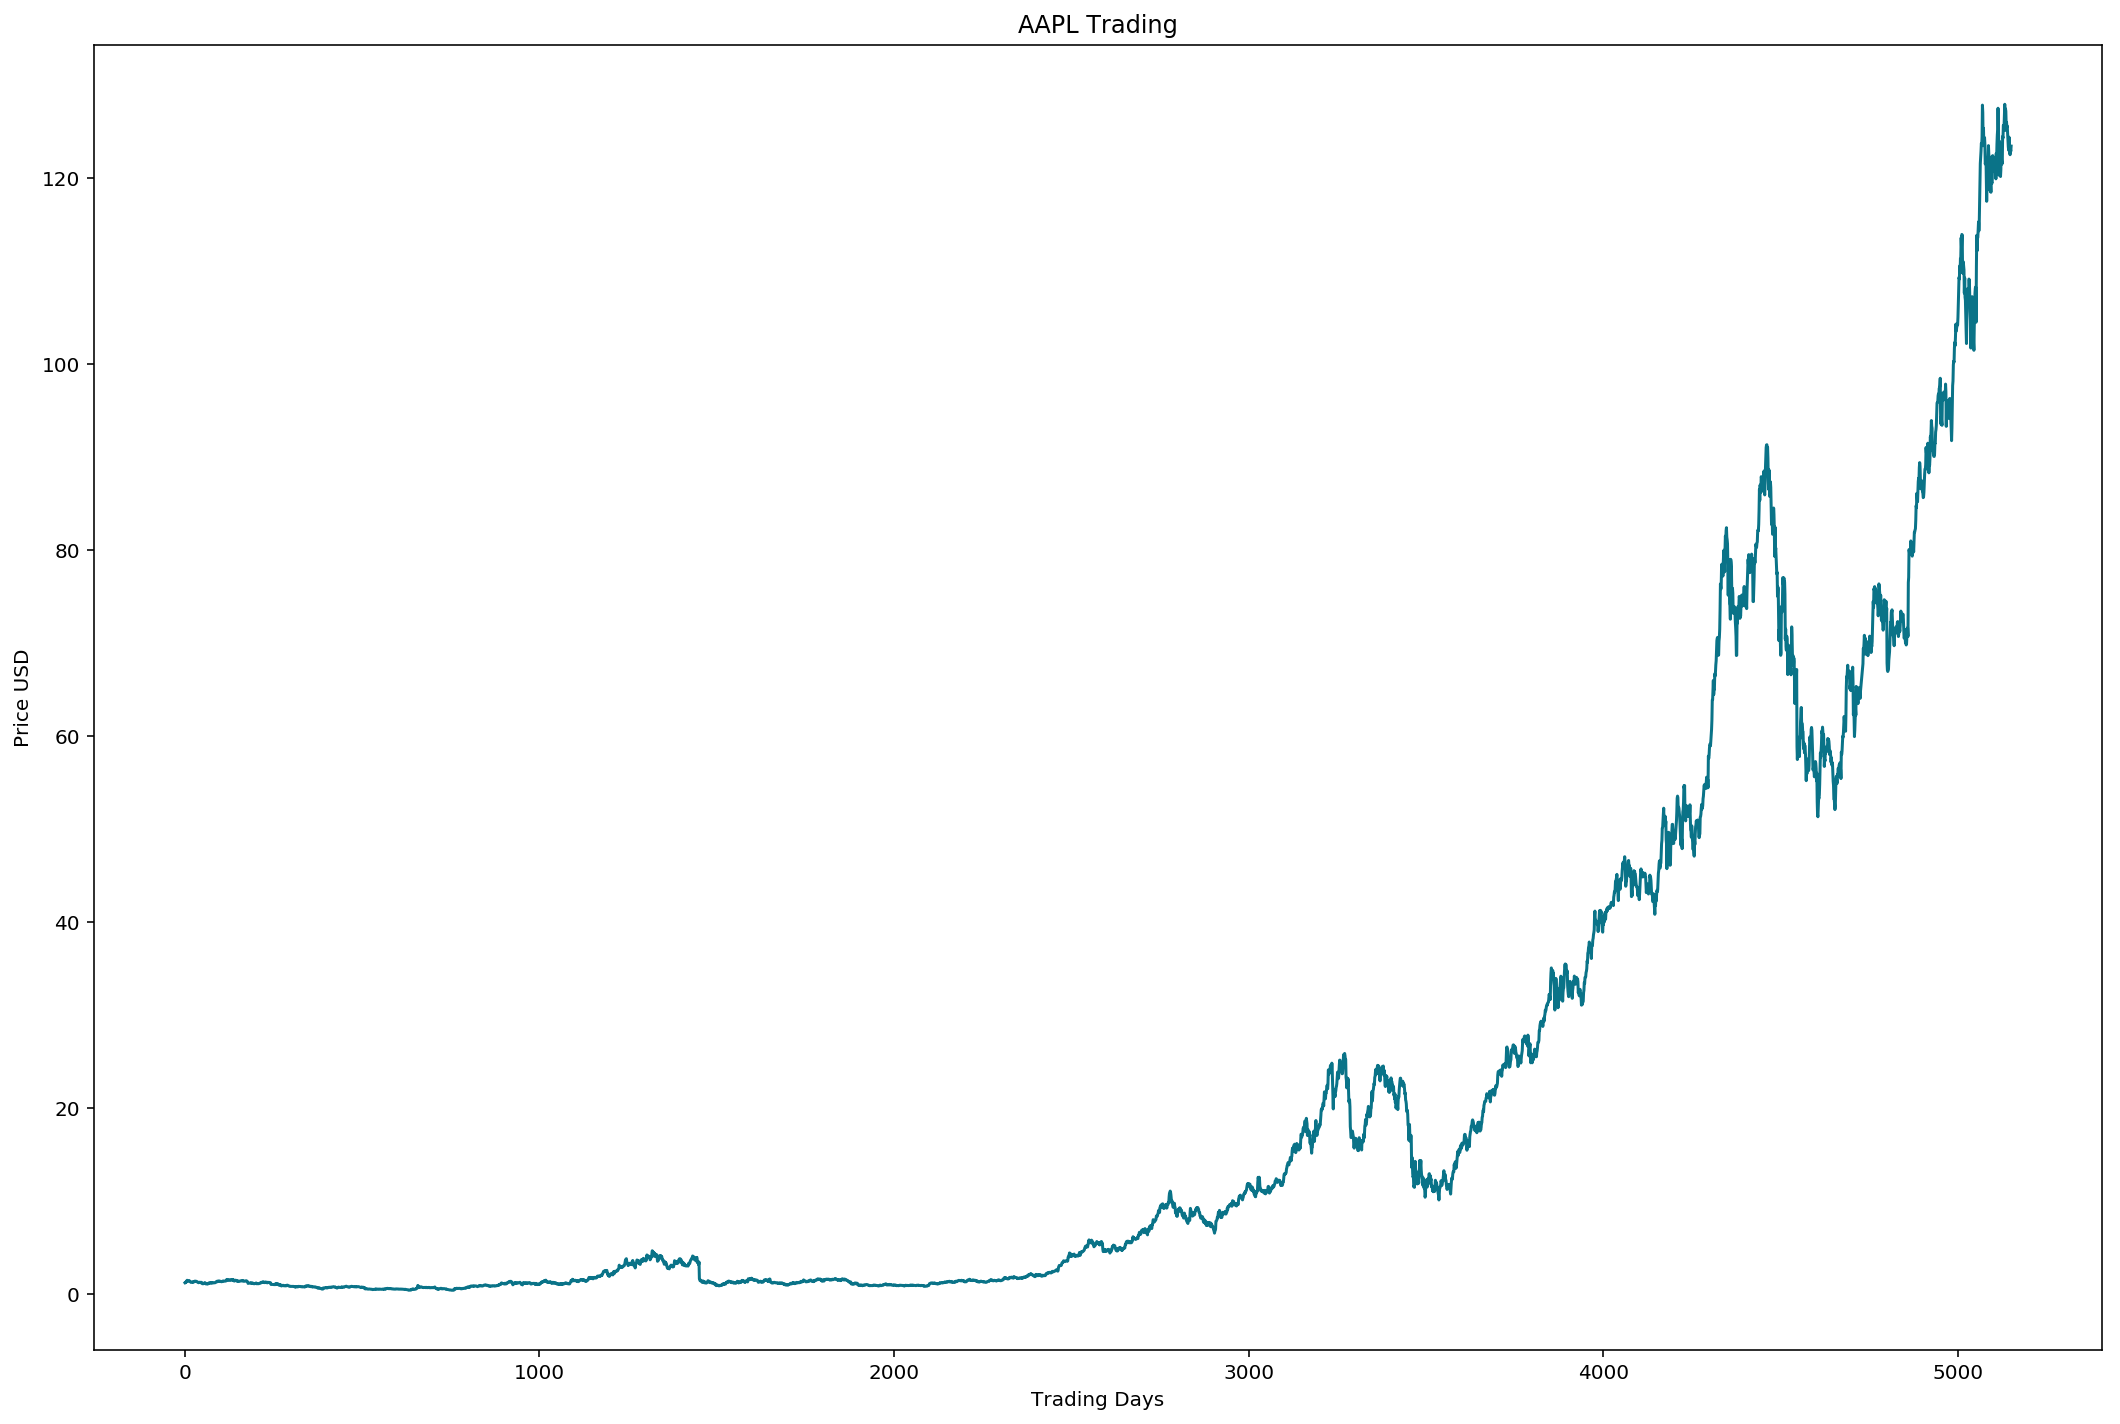

In [84]:
#Plot Basic Data
fig, ax = plt.subplots()
ax.plot(stock_df['Item'], stock_df['Adj_Close'], '#0A7388')

# format the coords message box
def price(x):
    return '$%1.2f' % x
#ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.set_title(base_ticker + ' Trading')

# Add labels
plt.ylabel('Price USD')
plt.xlabel('Trading Days')

plt.show()

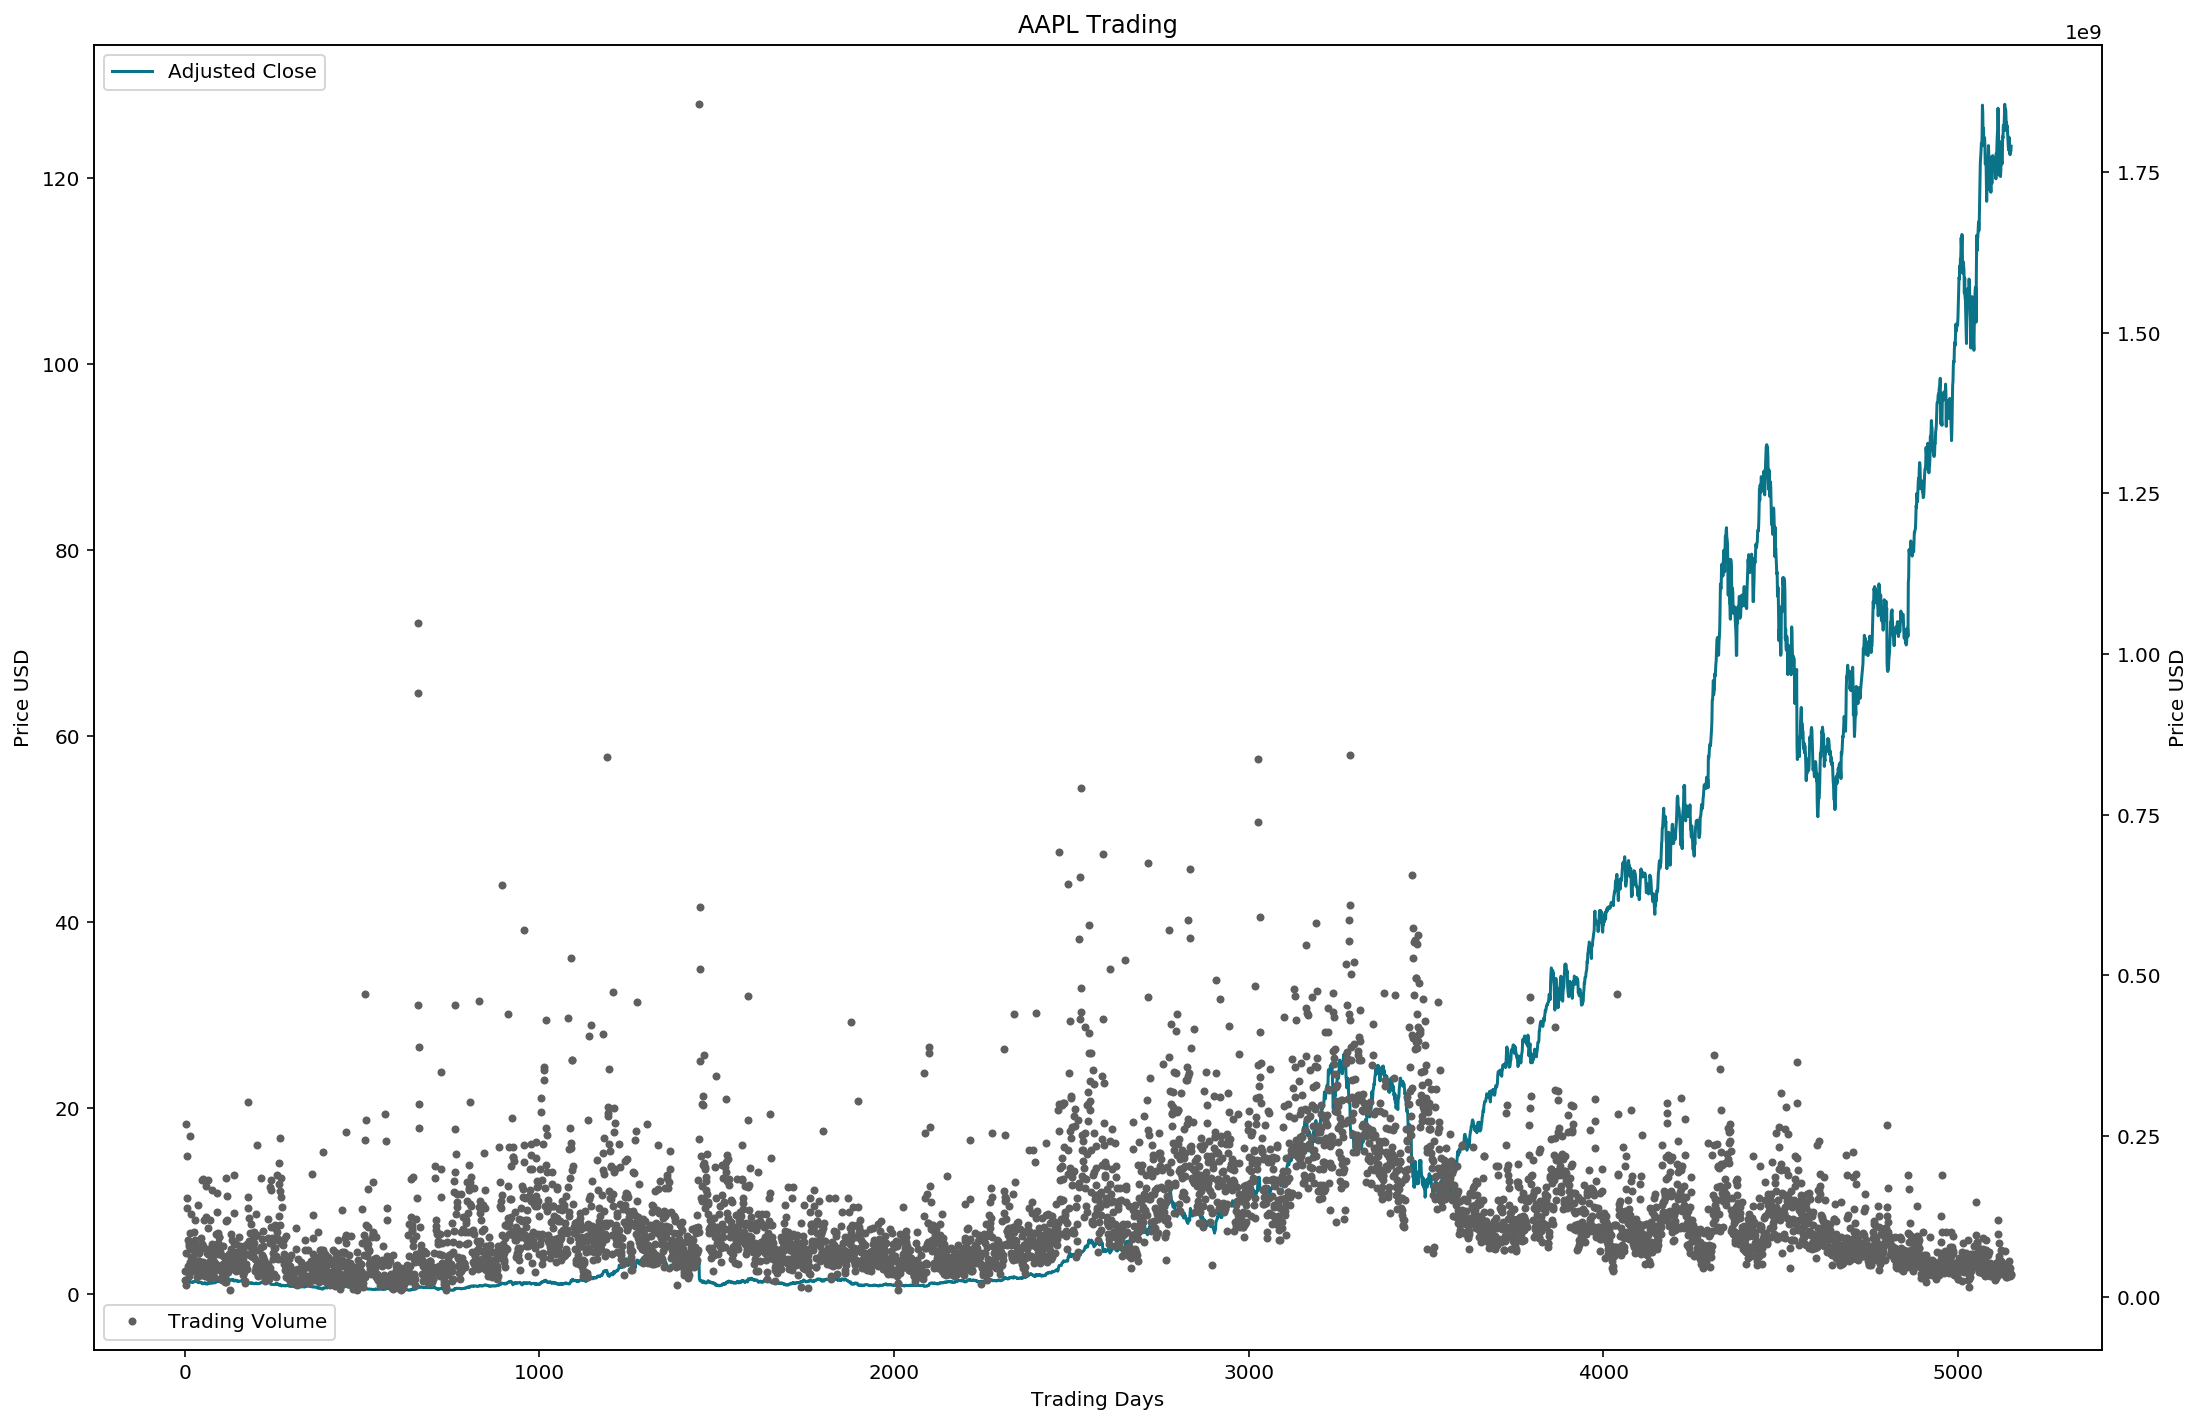

In [85]:
# Plot Basic Data
fig, ax1 = plt.subplots()
# Axis 1 - Adjusted Close
ax1.plot(stock_df['Item'], stock_df['Adj_Close'], '#0A7388', label='Adjusted Close')
# Set X Axis label
ax1.set_xlabel('Trading Days')
# Set Y Axis label
ax1.set_ylabel('Price USD')

# Axis 2 - Volume
ax2 = ax1.twinx()
ax2.plot(stock_df['Item'], stock_df['Volume'], 'r.', color='#5f5f5f', label='Trading Volume')
# Set Y Axis label
ax2.set_ylabel('Volume')

# Add labels
plt.ylabel('Price USD')
plt.xlabel('Trading Days')

# Add title and legend
ax1.set_title(base_ticker + ' Trading')
ax1.legend(loc='upper left')
ax2.legend(loc='lower left')

plt.show()

In [86]:
# Create a new DataFrame with Adjusted Close Delta and Volume for corelation
core_df = pd.DataFrame()
    
print(stock_df.head())

# Pull out necessary comparison data from stock data
close_yesterday = stock_df['Adj_Close'][:-1].reset_index()
close_today = stock_df['Adj_Close'][1:].reset_index()
volume_today = stock_df['Volume'][1:].reset_index()

# Add factors to dataframe
core_df['Adj_Close_Yest'] = close_yesterday['Adj_Close']
core_df['Adj_Close_Tod'] = close_today['Adj_Close']
core_df['Adj_Close_Delta'] = core_df['Adj_Close_Tod']-core_df['Adj_Close_Yest']
core_df['Adj_Close_Perc'] = core_df['Adj_Close_Delta']/core_df['Adj_Close_Yest']

core_df['Volume'] = volume_today['Volume']

print(core_df.head())
print(core_df.tail())



   Item        Date  Adj_Close     Volume
0     0  1995-01-03   1.228913   25967200
1     1  1995-01-04   1.260937   39670400
2     2  1995-01-05   1.244925   18410000
3     3  1995-01-06   1.344999  269155600
4     4  1995-01-09   1.319479   68521600
   Adj_Close_Yest  Adj_Close_Tod  Adj_Close_Delta  Adj_Close_Perc     Volume
0        1.228913       1.260937         0.032024        0.026059   39670400
1        1.260937       1.244925        -0.016012       -0.012698   18410000
2        1.244925       1.344999         0.100074        0.080386  269155600
3        1.344999       1.319479        -0.025520       -0.018974   68521600
4        1.319479       1.399039         0.079560        0.060297  153697600
      Adj_Close_Yest  Adj_Close_Tod  Adj_Close_Delta  Adj_Close_Perc    Volume
5146      124.152407     122.781413        -1.370994       -0.011043  36886200
5147      122.781413     122.540040        -0.241373       -0.001966  43988900
5148      122.540040     123.196574         0.656

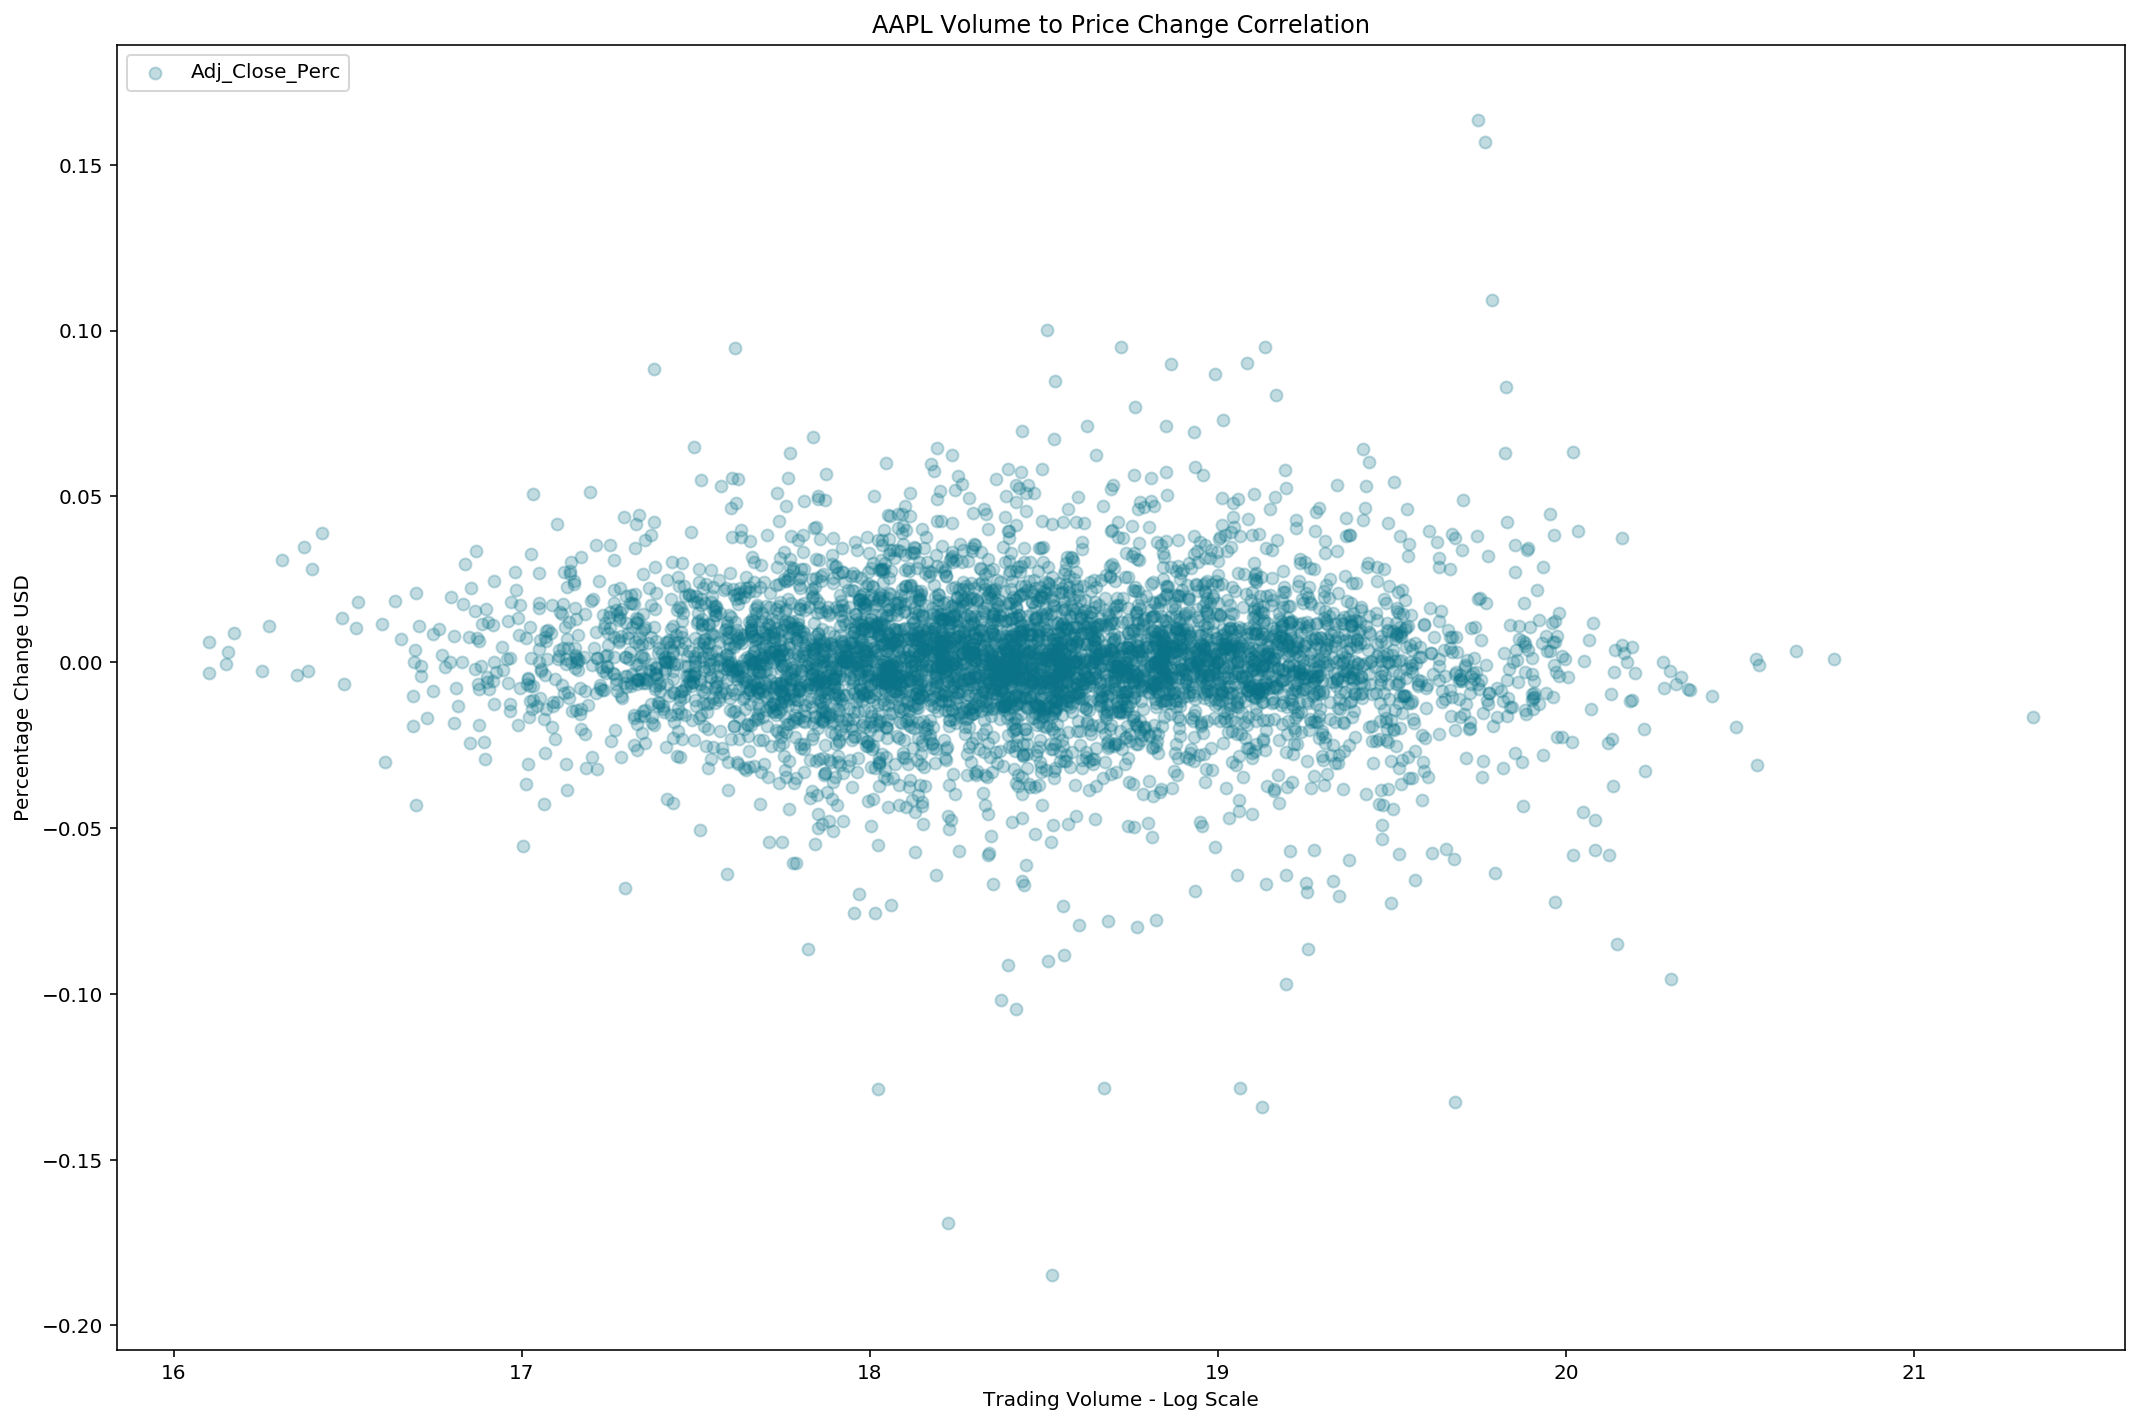

In [87]:
# Scale the data with natural log
plot_vol = np.log(core_df['Volume'])
plot_perc = core_df['Adj_Close_Perc']


# Plot Volume to Value Delta 
fig, ax1 = plt.subplots()
# Axis 1 - Adjusted Close
ax1.scatter(plot_vol, plot_delta, c='#0A7388', alpha=0.25)
# Set X Axis label
ax1.set_xlabel('Trading Volume - Log Scale')
# Set Y Axis label
ax1.set_ylabel('Percentage Change USD')

# Add title and legend
ax1.set_title(base_ticker + ' Volume to Price Change Correlation')
ax1.legend(loc='upper left')

plt.show()